# Sample assessment test

This notebook is an extended version of __[this work](https://github.com/murogrande/IBM-cert-exam-study-questions)__ on some relevant questions for the exam. Each of the question is discussed in more detail and each of the answers is justified by a related code run. Also, in some cases, alternative answers are provided.

Before proceeding with the questions, we import some of the tools that we will need for our code:

In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt

## Questions

### 1. Which code fragment, when run immediately after the code below, will save the following PNG image to disk?

In [3]:
qc = QuantumCircuit(2)
qc.cx(0,1)

# insert code here

- A. `qc.draw('circuit_drawing.png')`
- B. `qc.write_drawing(format='png', name ='circuit_drawing')`
- C. `qc.draw('latex', filename ='circuit_drawing.png')`
- D. `qc.draw('mpl', filename ='circuit_drawing.png')`

---

The answer is __D__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html)__, the `.draw()` method is defined as

```
QuantumCircuit.draw(output=None, scale=None, filename=None, style=None, interactive=False, plot_barriers=True, reverse_bits=False, justify=None, vertical_compression='medium', idle_wires=True, with_layout=True, fold=None, ax=None, initial_state=False, cregbundle=None, wire_order=None)
```

where the first parameter, `output`, has the description:

```
output (str) – select the output method to use for drawing the circuit. Valid choices are text, mpl, latex, latex_source. By default the text drawer is used unless the user config file (usually ~/.qiskit/settings.conf) has an alternative backend set as the default. For example, circuit_drawer = latex. If the output kwarg is set, that backend will always be used over the default in the user config file.
```

whereas for `filename`:

```
filename (str) – file path to save image to. Defaults to None.
```

If we run the code we will see that the PNG version of the image gets stored to the specified path.

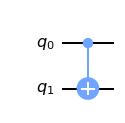

In [5]:
qc.draw('mpl', filename='./imgs/question1.png')

---
---

### 2. Which of the count results would be expected from this circuit? 

In [6]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.x(1)
qc.measure([0,1],[0,1])

- A. `{'01': 503, '10':521}`
- B. `{'00': 503, '11':521}`
- C. `{'10': 503, '11':521}`
- D. `{'00': 503, '01':521}`

---

The answer is __C__. The defined circuit looks like

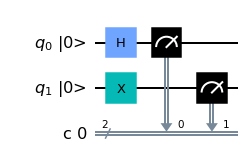

In [8]:
qc.draw('mpl', initial_state=True)

Where just right before measurement the state of the system is

$$ (X\otimes H)|q_1 q_0\rangle = X|q_1\rangle \otimes H|q_0\rangle $$

Since the specified operations are applied to single qubits, we expect a result where $|q_1\rangle$ is measured as $|1\rangle$ with probability $1$ as

$$ X|q_1\rangle = X|0\rangle = |1\rangle $$

while $|q_0\rangle$, having been put in a uniform superposition by the Hadamard gate, has $\tfrac{1}{2}$ probability of being measured in both the $|0\rangle$ and $|1\rangle$ states.

According to Qiskit's qubit ordering, the measured output string is such that the least significant digit corresponds to the measurement of the $0$-th qubit, meaning that combining the above considerations results in the equally probable outputs `10` and `11`.

We can verify this by checking the counts on the simulator:

In [10]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, sim).result()
counts = result.get_counts()

print(f'counts: {counts}')

counts: {'10': 524, '11': 500}


---
---

### 3. Given the code fragment below, what correctly displays the result for the two quantum registers?

In [11]:
qreg_a = QuantumRegister(2)
qreg_b = QuantumRegister(2)
creg = ClassicalRegister(4)
qc = QuantumCircuit(qreg_a,qreg_b,creg)

qc.x(qreg_a[0])
qc.measure(qreg_a,creg[0:2])
qc.measure(qreg_b,creg[2:4])

- A. `{'00 01': 1024}`
- B. `{'01 00': 1024}`
- C. `{'0001': 1024}`
- D. `{'0100': 1024}`

---

The answer is __C__. The defined circuit is

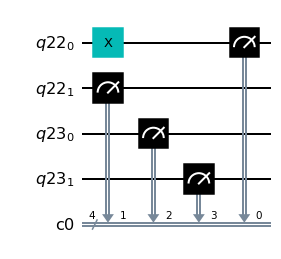

In [13]:
qc.draw('mpl')

As mentioned in the previous question, following Qiskit's bit ordering rule, the $0$-th qubit, the only one whose starting $|0\rangle$ state gets transformed into $|1\rangle$ by the $X$-gate, has its output written in the least significant bit of the measured bitstring.

With the simulator:

In [12]:
result = execute(qc, sim).result()
counts = result.get_counts(qc)
print(f'counts: {counts}')

counts: {'0001': 1024}


---
---

### 4. Which line of code, if run directly after the code below, would raise an error?

In [14]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

- A. `qc.draw('text')`
- B. `qc.draw('mpl')`
- C. `qc.draw('png')`
- D. `qc.draw('latex_source')`

---

The answer is __C__. Again, from the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html)__, the first parameter of the `.draw()` method, `output` is described as

```
output (str) – select the output method to use for drawing the circuit. Valid choices are text, mpl, latex, latex_source. By default the text drawer is used unless the user config file (usually ~/.qiskit/settings.conf) has an alternative backend set as the default. For example, circuit_drawer = latex. If the output kwarg is set, that backend will always be used over the default in the user config file.
```

meaning that out of all the options, `'png'` is the only non-valid choice, as it also tells us the `VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'` we get when running that line of code:

In [15]:
qc.draw('png')

VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'

---
---

### 5. Which line of code will return a random unitary Operator result such as that shown below?

![question5](./imgs/question5.png)

- A. `random_statevector('unitary'=2)`
- B. `random_unitary(4)`
- C. `random_statevector(2)`
- D. `random_unitary(2)`

---

The answer is __D__. Out of the options, A and C are to be immediately excluded as the `.random_statevector()` method __[returns a `Statevector` object](https://qiskit.org/documentation/stubs/qiskit.quantum_info.random_statevector.html)__, while the figure shows an `Operator`. 

The `.random_unitary(dims, seed=None)` method, according to the __[definition](https://qiskit.org/documentation/stubs/qiskit.quantum_info.random_unitary.html)__, outputs an `Operator` where the `dims` parameter is specified as 

```
dims (int or tuple) – the input dimensions of the Operator.
```

and since the output shown is that of a $2 \times 2$ matrix, the correct choice is `random_unitary(2)`

We verify this with:

In [16]:
from qiskit.quantum_info import random_unitary
random_unitary(2)

Operator([[-0.39412528+0.48768084j, -0.03135032-0.77836355j],
          [-0.2169962 +0.74816128j,  0.26574881+0.56793038j]],
         input_dims=(2,), output_dims=(2,))

---
---

### 6. Which parameter of the `execute` function can be used to set how much optimization to perform on the circuits?

- A. `circuit_level`
- B. `optimization_level`
- C. `circuit_optimization`
- D. `optimize_backend`

---

The answer is __B__. From the __[docs](https://qiskit.org/documentation/stable/0.24/apidoc/execute.html)__ of `qiskit.execute`, the function is defined as

```
execute(experiments, backend, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, qobj_id=None, qobj_header=None, shots=1024, memory=False, max_credits=10, seed_simulator=None, default_qubit_los=None, default_meas_los=None, schedule_los=None, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None, scheduling_method=None, init_qubits=None, **run_config)
```

with the following specification for the `optimization_level` parameter:

```
optimization_level (int) – How much optimization to perform on the circuits. Higher levels generate more optimized circuits, at the expense of longer transpilation time. #. No optimization #. Light optimization #. Heavy optimization #. Highest optimization If None, level 1 will be chosen as default.
```

The other alternatives are not valid parameters for the method.

---
---

### 7. Which code fragment would produce this circuit illustrate below?

![question7](./imgs/question7.png)

### Select one of the following:

- A.

In [ ]:
'''OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h.q[0];
barrier (q[0],q[1]);
z.q[1];
barrier (q[0], q[1]);
measure (q[0], c[0]);
measure (q[1], c[1]);
'''

- B.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0] -> c[0])
m += measure(q[1] -> c[1])
qc = qc + m

- C.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])

- D.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0], c[0])
m = measure(q[1], c[1])
qc = qc + m

---

The answer is __C__. If we run the code and then plot the result we get:

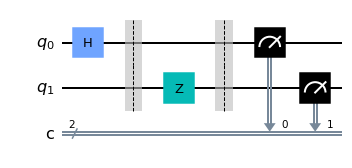

In [17]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])

qc.draw('mpl')

Option A. is to be discarded since the OpenQASM code shown has the wrong syntax:
- the `.` operator for the $H$ and $Z$ gates is misplaced, and should be substituted by a blank space;
- the `barrier` instruction __[is defined as](https://openqasm.com/language/delays.html#barrier-instruction)__ `barrier qregs|qubits` and does not allow for paretheses around the target qubits;
- from the __[docs](https://openqasm.com/language/insts.html#measurement)__, measurement in OpenQASM 2.0 is done with the command `measure qubit|qubit[] -> bit|bit[]` (while OpenQASM 3.0 also supports `bit|bit[] = measure qubit|qreg`).

A valid OpenQASM code that builds our circuit diagram could be:

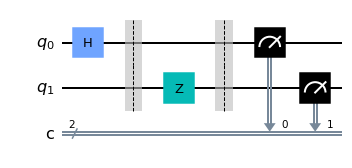

In [25]:
qasm_str = '''OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
barrier q[0],q[1];
z q[1];
barrier q[0], q[1];
measure q -> c;
'''

circ = QuantumCircuit.from_qasm_str(qasm_str)

circ.draw('mpl')

Option B. is not an answer also because of syntax:
- no explicit `QuantumRegister` is defined, so individual qubits should be addressed by their (integer) index;
- the `.measure()` method is defined as `QuantumCircuit.measure(qubit, cbit)`, so it has to be called on a `QuantumCircuit` object and __[does not support](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html)__ the arrow operator;also, it returns an `InstructionSet` object which does not support composition by the `+` operator.

For similar reason, option D. is also to be excluded.

---
---

### 8. Which code fragment would produce the illustrated circuit?

![question8](./imgs/question8_.png)

- A.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

- B.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(cr,a,qr)
qc.h(qr[0:2])
qc.x(a[0])

- C.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:1])
qc.x(a[0])

- D.

In [ ]:
qr = QReg(2,'q')
a = QReg (1,'a')
cr = CReg(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

---

The answer is __A__. In fact, if we run it:

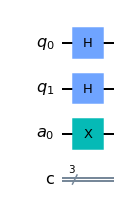

In [34]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

qc.draw('mpl')

Option B. does not hold since the two `QuantumRegister`s are passed to the `QuantumCircuit()` constructor in the wrong order, meaning that the `a` register will appear above the `q` one. To achieve the desiderd result, we should have `qc = QuantumCircuit(cr,qr,a)` instead of `qc = QuantumCircuit(cr,a,qr)`.

Option C. has the registers in order, but the `qc.h(qr[0:1])` instruction specifies that the $H$-gate should be applied only to the $0$-th qubit of the `qr` register, due __[how list slicing works in Python](https://stackoverflow.com/questions/509211/understanding-slicing)__. `qc.h(qr[0:2])` or `qc.h(qr)` would be the valid alternatives.

In D., the `QReg` and `CReg` syntaxes for defining quantum and classical register are not correct.

---
---

### 9. Select 2. Given this code fragment:

In [6]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
job = execute(qc, backend)

job_id = job.job_id()

ibmqfactory.load_account:WARNING:2023-01-11 15:56:13,814: Credentials are already in use. The existing account in the session will be replaced.


### Which two lines of code would each provide some information about the job?

- A. `job_monitor(job)`
- B. `job_monitor(backend)`
- C. `backend.status()`
- D. `job.status()` 
- E. `provider.status()`

---

Answers are __A__ and __D__. The `.execute()` method returns an `IBMQJob` instance which can either be fed as a parameter to `.job_monitor()`, as specified __[here](https://qiskit.org/documentation/stable/0.28/stubs/qiskit.providers.ibmq.job.IBMQJob.html?highlight=ibmqjob#qiskit.providers.ibmq.job.IBMQJob)__:

```
job_monitor(job, interval=None, quiet=False, output=<_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>, line_discipline='\r')
```

In [7]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


or can itself be used by invoking its `.status()` method, which, according to the __[docs](https://qiskit.org/documentation/stable/0.28/stubs/qiskit.providers.ibmq.job.IBMQJob.html?highlight=ibmqjob#qiskit.providers.ibmq.job.IBMQJob.status)__ also queries the server for the latest job status.

In [8]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

Choice B. can be eliminated by following the description of `.job_monitor()` above, where nowhere it is said that a backend object can be used as well.

Option C., while a valid instruction, it does not achieve what we want since __[the specifications](https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.BaseBackend.html#qiskit.providers.BaseBackend)__ of the `qiskit.providers.BaseBackend` object tell us that its `.status()` method returns the backend status, and not that of the job.

Option E. is invalid since the `AccountProvider` __[object](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.AccountProvider.html)__ returned by `qiskit.providers.ibmq.IBMQFactory.load_account` does not have a `.status()` method.

Another alternative that allows monitoring the status of a lauched job is the `job_watcher` for __[Jupyter notebooks](https://qiskit.org/documentation/apidoc/tools_jupyter.html)__:

In [9]:
from qiskit.tools.jupyter import job_watcher
%qiskit_job_watcher

job = backend.retrieve_job(job_id)

result = job.result()
counts = result.get_counts()
print(counts)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

{'00': 516, '11': 508}


---
---

### 10. Select 2. Which two of these can be used to initialize a vector of complex amplitudes on a quantum circuit (`qc`)?

- A. `qc.initialize([0,1],0)`
- B. `qc.initialize([0,0,1,1,0])`
- C. `qc.initialize([0,1,1],[0,1])`
- D. `qc.initialize([1,0,0,0],[0,1])`
- E. `qc.initialize([1,0,0,0])`

---

Answers are __A__ and __D__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html)__, the parameters of `QuantumCircuit.initialize(params, qubits=None)` are defined as:


```
- params (str or list or int):

    str: labels of basis states of the Pauli eigenstates Z, X, Y. See Statevector.from_label(). Notice the order of the labels is   reversed with respect to the qubit index to be applied to. Example label ‘01’ initializes the qubit zero to |1> and the qubit   one to |0>.

    list: vector of complex amplitudes to initialize to.

    int: an integer that is used as a bitmap indicating which qubits to initialize to |1>. Example: setting params to 5 would initialize qubit 0 and qubit 2 to |1> and qubit 1 to |0>.
```

```
- qubits (QuantumRegister or Qubit or int):

    QuantumRegister: A list of qubits to be initialized [Default: None].

    Qubit: Single qubit to be initialized [Default: None].

    int: Index of qubit to be initialized [Default: None].

    list: Indexes of qubits to be initialized [Default: None].
```

Meaning that option A. initializes the $0$-th qubit to the $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ state:

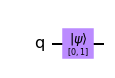

In [12]:
qc = QuantumCircuit(1)
qc.initialize([0,1], 0)
qc.draw('mpl')

while choice D. initializes the state of the first two qubits of the circuit to state $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$:

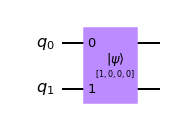

In [13]:
qc = QuantumCircuit(2)
qc.initialize([1, 0, 0, 0], [0, 1])
qc.draw('mpl')

Option B. is no good since the vector of complex amplitudes passed as input does not have a length that is a power of $2$ and is therefore not a valid one. Running the code would raise the exception:

```
QiskitError: 'Desired statevector length not a positive power of 2.'
```

Option C. does not work for the same reason.

As for option E., its syntax is not technically wrong, in the sense that the input list has a valid list of length $4$ and it is also possible to use `.initialize()` with just one parameter. However, this can only be done when specifying the state of single-qubit circuits, while the explicited statevector refers to a $2$-qubit system. 

We can verify this considerations with the following code:

In [17]:
qc = QuantumCircuit(1)
qc.initialize([1, 0, 0, 0])
qc.draw('mpl')

QiskitError: 'Initialize parameter vector has 4 elements, therefore expects 2 qubits. However, 1 were provided.'

---
---

### 11. Which code fragment could be used to produce this plot?

![question11](./imgs/question11.png)

The plot in the figure is the error map of the `ibmq_quito` backend. It can be displayed with the `qiskit.visualization.plot_error_map` __[function](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_error_map.html)__, defined as

```
plot_error_map(backend, figsize=(12, 9), show_title=True, qubit_coordinates=None)
```

A code example is given below:

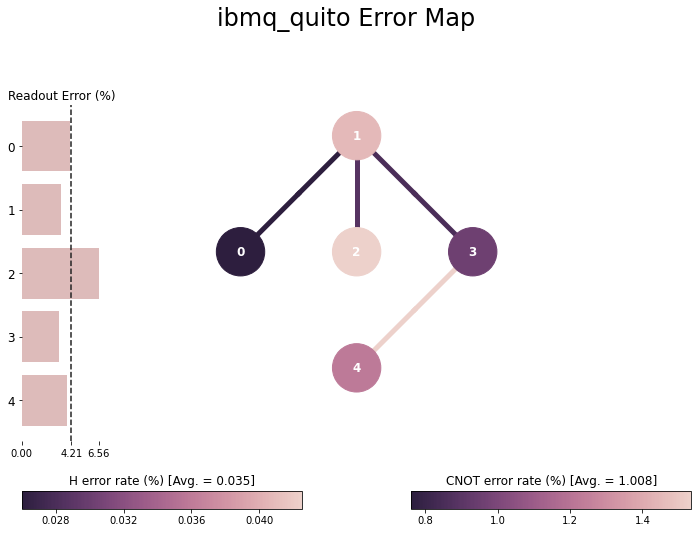

In [19]:
from qiskit.visualization import plot_error_map

backend = provider.get_backend('ibmq_quito')
plot_error_map(backend)

A similar plot, that outlines the connectivity of the specified backend, can be achieved with `qiskit.visualization.plot_gate_map`, that the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_gate_map.html)__ specify as:

```
plot_gate_map(backend, figsize=None, plot_directed=False, label_qubits=True, qubit_size=None, line_width=4, font_size=None, qubit_color=None, qubit_labels=None, line_color=None, font_color='w', ax=None, filename=None, qubit_coordinates=None)
```

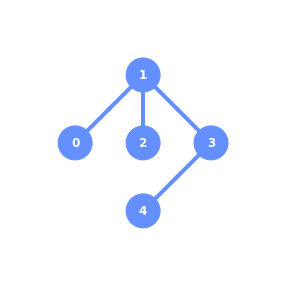

In [20]:
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)

---
---

### 12. Which code fragment, when inserted into the code below, would create a circuit with a matrix different to the identity matrix?

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)

# insert code here

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

- A.

In [ ]:
qc.crz(pi,0,1)
qc.crz(-pi,0,1)

- B.

In [ ]:
qc.crz(pi,0,1)
qc.cp(pi,0,1)

- C.

In [ ]:
qc.cz(0,1)
qc.cz(1,0)

- D.

In [ ]:
qc.cz(0,1)
qc.cp(pi,0,1)

---

The answer is __B__. This is because the $P$-gate (`PhaseGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)__) is equivalent to $R_z$ (`RZGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZGate.html)__) up to a phase factor:

$$ P(\lambda) = e^{i{\lambda}/2} R_z(\lambda) $$

In the single qubit case, this is just an irrelevant global phase, but when we consider the associated controlled operations, i.e., the $CP$ (`CPhaseGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CPhaseGate.html#qiskit.circuit.library.CPhaseGate)__) and the $CR_z$ (`CRZGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRZGate.html#qiskit.circuit.library.CRZGate)__), they are actually different gates, with a relative phase difference, and therefore their combination does not perform a complete rotation of $2\pi$ around the Z-axis, which would account for a trivial identity.

The difference between the two operation can be visualized by explicitly writing down their matrices (following Qiskit's ordering, see the __Note__ __[here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRZGate.html#qiskit.circuit.library.CRZGate)__):

$$ \begin{split}CR_z(\lambda)\ q_0, q_1 =
    I \otimes |0\rangle\langle 0| + R_z(\lambda) \otimes |1\rangle\langle 1| =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & e^{-i\frac{\lambda}{2}} & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\frac{\lambda}{2}}
    \end{bmatrix}\end{split} \longrightarrow CR_z(\pi) = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & -i & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & i
    \end{bmatrix} $$

$$ \begin{split}CP(\lambda) =
    I \otimes |0\rangle\langle 0| + P(\lambda) \otimes |1\rangle\langle 1| =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\lambda}
    \end{bmatrix}\end{split} \longrightarrow CP(\pi) =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & -1
    \end{bmatrix} $$

and then combining them as in the circuit, showing that the result is indeed not the identity,

$$ CP(\pi) CR_z(\pi) = 
\begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & -i & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & -i
\end{bmatrix} $$

This same result can also be verified with qiskit's `unitary_simulator` as:

In [39]:
qc = QuantumCircuit(2)

qc.crz(pi,0,1)
qc.cp(pi,0,1)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

[[ 1.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00-1.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  1.0000000e+00+0.j
   0.0000000e+00+0.j]
 [-0.0000000e+00+0.j -0.0000000e+00+0.j -0.0000000e+00+0.j
  -1.2246468e-16-1.j]]


Another proof can be done by initializing the circuit to a state that is not an eigenstate of the $CP(\pi) CR_z(\pi)$ operation, such as $|++\rangle$ (which would otherwise vanish the effect we are trying to visualize), and then checking that the transformed state is different from the starting one. We will do that with the help of the `statevector_simulator`:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


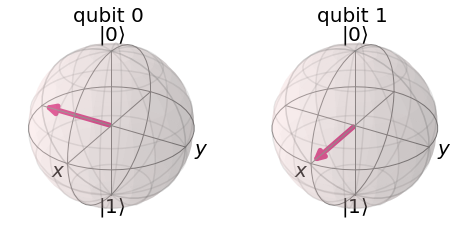

In [46]:
qc = QuantumCircuit(2)

qc.h([0, 1])

qc.crz(pi,0,1)
qc.cp(pi,0,1)

sv_sim = Aer.get_backend('statevector_simulator')
statevector = execute(qc, sv_sim).result().get_statevector()
plot_bloch_multivector(statevector)

which produces the output state $|+\circlearrowright\rangle$. We have found a counter-example of non-trivial transformation that is performed by our gates, i.e.,

$$ CP(\pi) CR_z(\pi) |++\rangle = |+\circlearrowright\rangle $$

Concerning the other alternatives, A. is trivially an identity since it involves two consecutive rotations of the same angle in opposite directions.

Choice C. is excluded by considering that the $CZ$ gate is symmetric, i.e., the following identity holds

![question12](./imgs/question12.png)

and since this operation is also Hermitian, the resulting trasformation is the identity matrix.

As for D., from the fact that $CZ = CP(\pi)$, combined with the above considerations, results in an overall identity transformation.

---
---

### 13. Given the devide details below from `%qiskit_backend_overview`

In [ ]:
import qiskit.tools.jupyter 
%qiskit_backend_overview

### Which devide would you send your job. If you wanted the results as soon as possible?

Answer is...

---

### 14. Which code fragment will create the circuit shown when inserted into the code below?

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)

#insert code fragment here
#Output


### you won't see the following lines of code in the exam, just focus on the figure
from IPython.display import Image

Image(url="imageassesment1.png", width=350, height=350)

In [ ]:
# A
 
qc.measure_all()

In [ ]:
# B

qc = QuantumCircuit(3)
qc.measure()

In [ ]:
# C

qc = QuantumCircuit(3)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

In [ ]:
# D

qc = QuantumCircuit(3)
for n in range(len(qc.qubits)):
    qc.measure(n,n)

The answer is __A__. 

---

### 15. Assuming that this sample code is added at each barrier in the QuantumCircuit, sort the Q-sphere in the order that they will display.

In [ ]:
## here you need to display each line or lines of code before each barrier in the Qsphere, the question is about 
#to put in order the sequence of states that will appear in the Qsphere. 

In [ ]:
qc = QuantumCircuit(3)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()
qc.z(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(2)

qc.draw('mpl')

In [ ]:
from qiskit.visualization import plot_state_qsphere
simulator= Aer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector)

---

### 16. Select 2. Given the following code:

In [ ]:
from qiskit import BasicAer, Aer, execute
qc = QuantumCircuit(1)
qc.h(0)

# insert code fragment here

print(unitary)

### Which two code fragments would you insert above to print the below output?

In [ ]:
# A 

simulator = BasicAer.get_backend('unitary_simulator')
unitary = execute(qc,simulator).get_unitary(qc)

In [ ]:
# B

simulator = Aer.get_backend('unitary_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary(qc)

In [ ]:
# C

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
unitary = result.get_matrix_result(qc)

In [ ]:
# D

simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary(qc)

In [ ]:
# E

simulator = BasicAer.get_backend('unitary_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary()

The answer is __A__.

---

### 17. Which code fragment defines vector such that the code below will show this output?

In [ ]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt

plot_bloch_vector(vector)

In [ ]:
# A
 
vector = [1,-1,0]

In [ ]:
# B

vector = [pi/2,-pi/4,0]

In [ ]:
# C

vector = [1/sqrt(2),-1/sqrt(2),0]

In [ ]:
# D

vector = [1/sqrt(2),-1/sqrt(2),-1]

The answer is __C__.

---

### 18. How many qubits does this Q-sphere represents? 

In [ ]:
from qiskit.visualization import plot_state_qsphere
qc = QuantumCircuit(3)
qc.h(0)
#qc.z(0)
qc.x(1)
qc.cx(0,1)
qc.x(2)
qc.cx(1,2)


backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
statevector= job.get_statevector()

plot_state_qsphere(statevector)

---

### 18. Which code fragment produces this output?

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
simulator = Aer.get_backend('unitary_simulator')
job = execute(qc,simulator)
result = job.result()
outputstate = result.get_unitary(qc,1)
print(outputstate)

---

### 19. Which code fragment produces this circuit?

In [ ]:
qc = QuantumCircuit(3,3)
qc.h([0,1,2])
qc.barrier()
qc.measure([0,1,2],range(3))
qc.draw()

In [ ]:
print(qc.qasm())

---

### 19. Which would be printed when calling `print(counts)` in the code below? A drawing of qc in its final state has been included.

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
qc= QuantumCircuit(3)
qc.x([0,1,2])
qc.ccx(0,1,2)
qc.measure_all()



result = execute(qc,qasm_sim).result()
counts = result.get_counts()
print(counts)

In [ ]:
qc= QuantumCircuit(3)
qc.ct()

---

### 20. Given the code:

In [ ]:
from qiskit.quantum_info import DensityMatrix

matrix1 = [
    [1,0],[0,0]
]
matrix2 = [
    [0.5,0.5],[0.5,0.5]
]

#### Which code fragment would provide the below output?

In [ ]:
#A
result= DensityMatrix.tensor(matrix1,matrix2)
print(result)

In [ ]:
#B
matrix1 = DensityMatrix(matrix1)
print(matrix1.tensor(matrix2))

In [ ]:
#C
print(matrix1.tensor(matrix2))

In [ ]:
#D
print(DensityMatrix.tensor(matrix1,matrix2))

The answer is __B__.

---

### 21. Which diagram will be produced by the circuit illustrated below?

In [ ]:
from qiskit.visualization import plot_state_city
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.z(0)

simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc,simulator).result()
statevector = job.get_statevector()

plot_state_city(statevector)

---

### 21. When starting at qubit state $|0\rangle$, which code snippet will result in the qubit state $|0\rangle$

In [ ]:
qc = QuantumCircuit(1)

#A
#qc.ry(pi/2,0)
#qc.s(0)
#qc.rx(pi/2,0)

#B
#qc.ry(pi/2,0)
#qc.rx(pi/2,0)
#qc.s(0)

#C
#qc.s(0)
#qc.ry(pi/2,0)
#qc.rx(pi/2,0)

#D
qc.rx(pi/2,0)
qc.s(0)
qc.ry(pi/2,0)




qc.measure_all()

simulator = BasicAer.get_backend('qasm_simulator')
job = execute(qc,simulator).result()
counts = job.get_counts()

print(counts)

---

In [ ]:
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc1= QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.cx(0,1)

#qc.draw('mpl')

rho_qc=DensityMatrix.from_instruction(qc)
rho_qc.draw()

rho1= DensityMatrix.from_instruction(qc1)
rho1.draw()

qc1new = qc1.decompose()
qc1new.draw()
#tensor1 = DensityMatrix.from_label('[[0,1],[1,0]]')

In [ ]:
qc = QuantumCircuit(2)

#v1,v2 = [0,1],[0,1]

v = [1/sqrt(2),0,0,1/sqrt(2)]
qc.initialize(v,[0,1])


qc.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')

result = execute(qc, simulator).result()

statevector = result.get_statevector()
print(statevector)

In [ ]:
from qiskit.circuit.library import CXGate

ccx = CXGate().control()

qc = QuantumCircuit(3)

qc.append(ccx,[0,1,2])


qc.draw()

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

In [ ]:
qc= QuantumCircuit(3)
qc.barrier()

qc.barrier([0])
qc.draw()

In [ ]:
qc = QuantumCircuit.from_qasm_file('myfile.qasm')

qc.measure_all()
qc.draw(output='latex_source')

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_state_paulivec, plot_state_city, plot_bloch_vector, plot_state_hinton, plot_bloch_multivector
stavec = Statevector.from_label('001')

In [ ]:
plot_state_paulivec(stavec)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

In [ ]:
import qiskit.tools.jupyter
%qiskit_backend_overview